<a href="https://colab.research.google.com/github/ziadbadwy/brainTumorClassification/blob/main/breast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import shutil
import glob
import math
import random
from google.colab.patches import cv2_imshow
import tensorflow.image as tfi
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#!pip install opendatasets


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import opendatasets as od

from google.colab import files



In [2]:
od.download("https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ziadzamab
Your Kaggle Key: ··········


100%|██████████| 195M/195M [00:09<00:00, 21.4MB/s]


In [ ]:
#Remove mask

b="/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign"
m="/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant"
n="/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal"
for dir in os.listdir(n):
  
  p=os.path.join(n,dir)
  isexist = os.path.exists(p)
  if p.find("_mask")>=0:
    print(p)
    print(isexist)
    if isexist :
      print(p)
      os.remove(p)
for dir in os.listdir(b):
  
  p=os.path.join(b,dir)
  isexist = os.path.exists(p)
  if p.find("_mask")>=0:
    print(p)
    print(isexist)
    if isexist :
      print(p)
      os.remove(p)
for dir in os.listdir(m):
  
  p=os.path.join(m,dir)
  isexist = os.path.exists(p)
  if p.find("_mask")>=0:
    print(p)
    print(isexist)
    if isexist :
      print(p)
      os.remove(p)



  


In [166]:

image2 = cv2.imread('/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (10).png')
heatmap1 = cv2.applyColorMap(image2, cv2.COLORMAP_JET)
heatmap2 = cv2.cvtColor(heatmap1, cv2.COLOR_BGR2RGB)


cv2.GaussianBlur(image2)
cv2_imshow(heatmap2)
cv2_imshow(image2)


error: ignored

In [5]:
#uploaded = files.upload()


In [207]:
#count images according to classes 
pathTrain="/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"
pathCV = "/content/breast-ultrasound-images-dataset/test"
pathTest="/content/breast-ultrasound-images-dataset/cv"
img_height=224
img_width=224
batchSize = 32

numberOfTrain = {}
numberOfCV = {}
numberOfTest={}

images_train_data={}
images_CV_data={}
images_Test_data={}


pathOfEachTrain=[]
pathOfEachCV=[]
pathOfEachtest=[]
labels=[]
n_images=0
for dir in os.listdir(pathTrain):
  images_train_data[dir]=os.listdir(os.path.join(pathTrain,dir))
  pathOfEachTrain.append(os.path.join(pathTrain,dir))
  numberOfTrain[dir] = len(os.listdir(os.path.join(pathTrain,dir)))
  n_images+=len(os.listdir(os.path.join(pathTrain,dir)))
for dir in os.listdir(pathCV):
  images_CV_data[dir]=os.listdir(os.path.join(pathCV,dir))
  pathOfEachCV.append(os.path.join(pathCV,dir))
  numberOfCV[dir] = len(os.listdir(os.path.join(pathCV,dir)))
for dir in os.listdir(pathTest):
  images_Test_data[dir]=os.listdir(os.path.join(pathTest,dir))
  pathOfEachtest.append(os.path.join(pathTest,dir))
  numberOfTest[dir] = len(os.listdir(os.path.join(pathTest,dir)))

def spliting(n_images,dir_name,percent=0.05):
  count=-1
  for i in images_train_data:
    tmp=[] 
    tmp=images_train_data[i]
    tmp=tmp[0:math.ceil(n_images*percent)]
    count+=1
    for j in tmp:
        newpath = f'/content/breast-ultrasound-images-dataset/{dir_name}/{i}'
        if not os.path.exists(newpath):
               os.makedirs(newpath)
        shutil.move(os.path.join(pathOfEachTrain[count],j),newpath)







               
               
  
   
   
#spliting(n_images,'cv',0.05)
#spliting(n_images,'test',0.05)


In [226]:
n_images
numberOfTrain
labels=['benign','malignant','normal']
labels
images_train_data

{'normal': ['normal_generated85_0_2241.png',
  'normal (87).png',
  'normal (114).png',
  'normal_generated89_0_6100.png',
  'normal (43).png',
  'normal (48).png',
  'normal (14).png',
  'normal_generated42_0_1510.png',
  'normal (37).png',
  'normal (107).png',
  'normal_generated40_0_4722.png',
  'normal_generated83_0_6379.png',
  'normal_generated105_0_2104.png',
  'normal (81).png',
  'normal_generated41_0_7568.png',
  'normal_generated27_0_7246.png',
  'normal (35).png',
  'normal_generated71_0_2660.png',
  'normal_generated37_0_3864.png',
  'normal_generated47_0_269.png',
  'normal_generated8_0_1227.png',
  'normal_generated9_0_1455.png',
  'normal_generated4_0_7008.png',
  'normal (27).png',
  'normal (100).png',
  'normal (96).png',
  'normal_generated22_0_685.png',
  'normal (49).png',
  'normal (60).png',
  'normal_generated113_0_2633.png',
  'normal_generated92_0_9843.png',
  'normal_generated65_0_3103.png',
  'normal_generated112_0_7631.png',
  'normal_generated115_0_3245.

In [147]:
#data augm train
trainGen = ImageDataGenerator(
                             vertical_flip=True,
                             rescale=1/255,
                             #horizontal_flip = True
                              )

     
'''
z=0
for j in images_train_data['normal']:
    img = load_img(os.path.join(pathTrain,'normal',j))
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    count=0
    z+=1
    for batch in trainGen.flow(x,save_to_dir=f"{pathTrain}/normal",save_prefix=f'normal_generated{z}',save_format='png'):
        count+=1
        if count>1:
           break;


'''     
Train_prepare = trainGen.flow_from_directory(directory = pathTrain,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 905 images belonging to 3 classes.


In [148]:
test_prepare = trainGen.flow_from_directory(directory = pathTest,target_size=(224,224),batch_size=7,class_mode='categorical')


Found 189 images belonging to 3 classes.


In [149]:
CV_prepare = trainGen.flow_from_directory(directory = pathTest,target_size=(224,224),batch_size=7,class_mode='categorical')


Found 189 images belonging to 3 classes.


In [162]:
# load the InceptionResNetV2 architecture with imagenet weights as base
base_model = tf.keras.applications.InceptionResNetV2(
					include_top=False,
					weights='imagenet',
					input_shape=(224,224,3)
					)

base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.

model = tf.keras.Sequential([
		base_model,
		tf.keras.layers.BatchNormalization(renorm=True),
		tf.keras.layers.GlobalAveragePooling2D(),
		tf.keras.layers.Dense(512, activation='relu'),
		tf.keras.layers.Dense(256, activation='relu'),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(3, activation='softmax')
	])


In [163]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [164]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="mymodel.h5",save_best_only=True,verbose=1,mode='auto') 
cd=[es,mc] 

In [165]:
history = model.fit_generator(
  Train_prepare,
  validation_data=CV_prepare,
  epochs=30,
  callbacks=cd
)

Epoch 1/30
29/29 [==============================] - ETA: 0s - loss: 0.9946 - accuracy: 0.5359
Epoch 1: val_accuracy improved from -inf to 0.65079, saving model to mymodel.h5
29/29 [==============================] - 28s 610ms/step - loss: 0.9946 - accuracy: 0.5359 - val_loss: 0.7843 - val_accuracy: 0.6508
Epoch 2/30
29/29 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.6972
Epoch 2: val_accuracy improved from 0.65079 to 0.75661, saving model to mymodel.h5
29/29 [==============================] - 13s 446ms/step - loss: 0.6898 - accuracy: 0.6972 - val_loss: 0.5969 - val_accuracy: 0.7566
Epoch 3/30
29/29 [==============================] - ETA: 0s - loss: 0.5427 - accuracy: 0.7834
Epoch 3: val_accuracy improved from 0.75661 to 0.76190, saving model to mymodel.h5
29/29 [==============================] - 13s 462ms/step - loss: 0.5427 - accuracy: 0.7834 - val_loss: 0.5177 - val_accuracy: 0.7619
Epoch 4/30
29/29 [==============================] - ETA: 0s - loss: 0.4862 -

In [167]:
f=history.history
print(f.keys())
print(max(f['accuracy']))
print(max(f['val_accuracy']))
print(min(f['loss']))
print(min(f['val_loss']))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.9801105260848999
0.9576719403266907
0.06737962365150452
0.15531501173973083


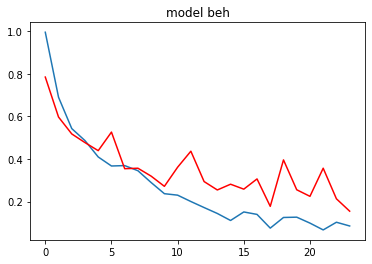

In [168]:
plt.plot(f['loss'])
plt.plot(f['val_loss'],c="red")
plt.title("model beh")
plt.show()

In [169]:
from keras.models import load_model
model = load_model("/content/mymodel.h5")
     

In [175]:
accuracy_score = model.evaluate(test_prepare)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

27/27 [==============================] - 2s 83ms/step - loss: 0.2559 - accuracy: 0.9577
[0.2558722496032715, 0.9576719403266907]
Accuracy: 95.7672%
Loss:  0.2558722496032715


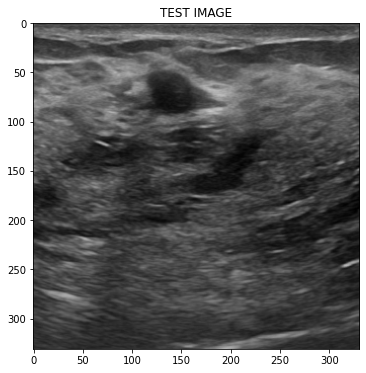

In [181]:
test_img_path = "/content/breast-ultrasound-images-dataset/test/benign/benign (118).png"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])


In [188]:
df=pd.DataFrame({'names':list(images_Test_data.keys()),
                 'index':list(images_Test_data.values())})

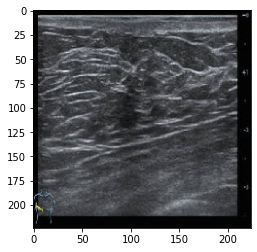

1/1 [==============================] - 0s 67ms/step
normal
This image most likely belongs to normal with a 57.11 percent confidence.


In [238]:
path = "/content/A318601_1_En_3_Fig3_HTML.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

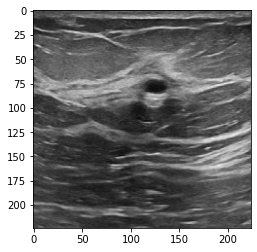

1/1 [==============================] - 0s 42ms/step
benign
This image most likely belongs to benign with a 99.72 percent confidence.


In [239]:
path = "/content/breast-ultrasound-images-dataset/test/benign/benign (12).png"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

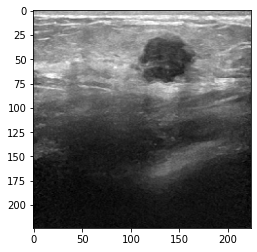

1/1 [==============================] - 0s 41ms/step
malignant
This image most likely belongs to malignant with a 92.21 percent confidence.


In [240]:
path = "/content/breast-ultrasound-images-dataset/test/malignant/malignant (48).png"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)